# Ejercicio 1: Regresión Lineal Simple desde Cero

In [1]:
#Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Cargar los datos
url = "https://www.statlearning.com/s/Advertising.csv"
df =pd.read_csv(url)
print(df.head())

#Definir las variables independientes y dependientes
X = df['TV']
y = df['sales']

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
# Definir la función de regresión lineal simple y su entrenamiento
def regresion_lineal_simple(X, y, lr=0.01, epochs=1000, verbose=True):
    np.random.seed(0)
    w =np.random.randn()  #Valor inicial aleatorio
    b =np.random.randn()  # Valor inicial aleatorio

    for i in range(epochs):
        y_pred = w * X + b
        error= y_pred - y
                
        #Calcula la pérdida
        perdida =np.mean((error) ** 2)
        
        # Calcula los gradientes
        w_gradiente = (2/ len(X)) * np.sum(X * error)
        b_gradiente = (2 / len(X)) * np.sum(error)
        
        #Actualiza los parámetros
        w -=lr * w_gradiente
        b-= lr *b_gradiente
        
        if verbose:
            print("Iteración:", i+1, "Pérdida:", round(perdida))
    
    #Mostrar los resultados
    plt.figure(figsize=(6,6))
    plt.scatter(X, y, color='blue', label='Datos originales')
    plt.plot(X, w * X + b,color='red',label='Recta ajustada')
    plt.xlabel('Publicidaden TV')
    plt.ylabel('Ventas')
    plt.title('Regresión Lineal Simple')
    plt.legend()
    plt.grid(True)
    plt.show()
    return w, b

Iteración: 1 Pérdida: 82022
Iteración: 2 Pérdida: 14547
Iteración: 3 Pérdida: 2595
Iteración: 4 Pérdida: 477
Iteración: 5 Pérdida: 102
Iteración: 6 Pérdida: 36
Iteración: 7 Pérdida: 24
Iteración: 8 Pérdida: 22
Iteración: 9 Pérdida: 22
Iteración: 10 Pérdida: 22
Iteración: 11 Pérdida: 22
Iteración: 12 Pérdida: 22
Iteración: 13 Pérdida: 22
Iteración: 14 Pérdida: 22
Iteración: 15 Pérdida: 22
Iteración: 16 Pérdida: 22
Iteración: 17 Pérdida: 22
Iteración: 18 Pérdida: 22
Iteración: 19 Pérdida: 22
Iteración: 20 Pérdida: 22
Iteración: 21 Pérdida: 22
Iteración: 22 Pérdida: 22
Iteración: 23 Pérdida: 22
Iteración: 24 Pérdida: 22
Iteración: 25 Pérdida: 22
Iteración: 26 Pérdida: 22
Iteración: 27 Pérdida: 22
Iteración: 28 Pérdida: 22
Iteración: 29 Pérdida: 22
Iteración: 30 Pérdida: 22
Iteración: 31 Pérdida: 22
Iteración: 32 Pérdida: 22
Iteración: 33 Pérdida: 22
Iteración: 34 Pérdida: 22
Iteración: 35 Pérdida: 22
Iteración: 36 Pérdida: 22
Iteración: 37 Pérdida: 22
Iteración: 38 Pérdida: 22
Iteración: 

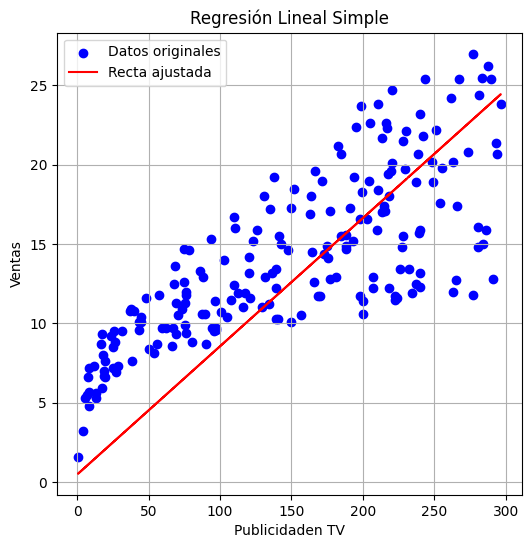


Parámetros entrenados:
Pendiente (w): 0.08092127102723583
Sesgo (b): 0.45855349139246304


In [4]:
# Entrenamiento del modelo de regresión lineal simple
# Tuve que ajustar el learning rate y epochs ya que con los valores originales no convergía y daba error
w, b=regresion_lineal_simple(X, y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados:")
print(f"Pendiente (w): {w}")
print(f"Sesgo (b): {b}")

# Ejercicio 2: Regresión Lineal Múltiple desde Cero

In [5]:
#Definir las variables independientes y dependientes. El dataset es el mismo que en el ejercicio anterior
X = df[['TV', 'radio','newspaper']]
y =df['sales']

In [6]:
# Definir la función de regresión múltiple y su entrenamiento
def regresion_lineal_multiple(X, y, lr=0.01, epochs=1000, verbose=True):
    np.random.seed(0)
    muestras, variables = X.shape
    w =np.random.randn(variables)  #Valores iniciales aleatorios
    b =np.random.randn()           # Valor inicial aleatorio

    for i in range(epochs):
        y_pred = X @ w + b
        error= y_pred - y

        #Calcula la pérdida 
        perdida =np.mean((error) ** 2)
        
        # Calcula los gradientes
        w_gradiente = (2/ muestras) * (X.T @ error)
        b_gradiente = (2 / muestras)*np.sum(error)
        
        #Actualiza los parámetros
        w -=lr * w_gradiente
        b -= lr *b_gradiente
        
        if verbose:
            print("Iteración:", i+1, "Pérdida:", round(perdida, 4))
    return w, b

In [7]:
# Entrenamiento del modelo de regresión lineal múltiple
# Al igual que el ejercicio anterior, tuve que ajustar el learning rate y epochs ya que con los valores originales no convergía y daba error
w, b =regresion_lineal_multiple(X, y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados:")
print(f"Pendiente (w):{w}")
print(f"Sesgo (b):{b}")

Iteración: 1 Pérdida: 104839.5585
Iteración: 2 Pérdida: 16789.5212
Iteración: 3 Pérdida: 2889.6257
Iteración: 4 Pérdida: 689.4279
Iteración: 5 Pérdida: 335.4372
Iteración: 6 Pérdida: 272.9549
Iteración: 7 Pérdida: 256.6726
Iteración: 8 Pérdida: 247.879
Iteración: 9 Pérdida: 240.4598
Iteración: 10 Pérdida: 233.4443
Iteración: 11 Pérdida: 226.6736
Iteración: 12 Pérdida: 220.1167
Iteración: 13 Pérdida: 213.7634
Iteración: 14 Pérdida: 207.6067
Iteración: 15 Pérdida: 201.6403
Iteración: 16 Pérdida: 195.8583
Iteración: 17 Pérdida: 190.2549
Iteración: 18 Pérdida: 184.8244
Iteración: 19 Pérdida: 179.5614
Iteración: 20 Pérdida: 174.4608
Iteración: 21 Pérdida: 169.5174
Iteración: 22 Pérdida: 164.7262
Iteración: 23 Pérdida: 160.0825
Iteración: 24 Pérdida: 155.5818
Iteración: 25 Pérdida: 151.2194
Iteración: 26 Pérdida: 146.9911
Iteración: 27 Pérdida: 142.8927
Iteración: 28 Pérdida: 138.92
Iteración: 29 Pérdida: 135.0693
Iteración: 30 Pérdida: 131.3366
Iteración: 31 Pérdida: 127.7182
Iteración: 32 

In [8]:
#crear un modelo de regresión lineal usando scikit-learn
modelo_sci =LinearRegression()

# Ajustar el modelo a los datos
modelo_sci.fit(X,y)

#Mostrar los resultados
print("Pendientes sklearn:")
print(modelo_sci.coef_)
print("Sesgo sklearn:")
print(modelo_sci.intercept_)


Pendientes sklearn:
[ 0.04576465  0.18853002 -0.00103749]
Sesgo sklearn:
2.938889369459412


In [9]:
# Mostrar resultados de sklearn
print("Pendientes sklearn:")
print(modelo_sci.coef_)

print("Sesgo sklearn:")
print(modelo_sci.intercept_)

# Mostrar resultadossin sklearn
print("Pendientes modelo:")
print(w)
print("Sesgo modelo:")
print(b)


Pendientes sklearn:
[ 0.04576465  0.18853002 -0.00103749]
Sesgo sklearn:
2.938889369459412
Pendientes modelo:
TV           0.047700
radio        0.196485
newspaper    0.003341
dtype: float64
Sesgo modelo:
2.2320850715003515


### Comentarios sobre los resultados

- Al comparar los parámetros aprendidos por el modelo implementado y por sklearn, se observa que las pendientes obtenidas para las tres variables (TV, radio y newspaper) son bastante cercanas, lo que indica que el modelo está captando correctamente la relación entre las variables de entrada y la salida.
- El sesgo (b) calculado por el modelo propio también es similar al de sklearn, aunque es algo menor, pero no hay una diferencia significativa que indique un problema grave de convergencia.
- Las diferencias observadas, aunque pequeñas, pueden deberse al número de iteraciones o al learning rate utilizados en el gradiente descendente.
- Si se desea ajustar aún más el modelo y acercar los valores, sería recomendable aumentar el número de iteraciones o ajustar ligeramente el learning rate para refinar la convergencia.
- En resumen, el modelo propio aproxima bien los coeficientes de sklearn, tanto en las pendientes como en el sesgo, y muestra que la implementación es correcta y funciona adecuadamente.

In [10]:
# Caso 1: learning rate pequeño
w, b = regresion_lineal_multiple(X,y, lr=0.00001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 1:")
print(f"Pendiente caso 1 (w): {w}")
print(f"Sesgo caso 1(b): {b}")

Iteración: 1 Pérdida: 104839.5585
Iteración: 2 Pérdida: 16789.5212
Iteración: 3 Pérdida: 2889.6257
Iteración: 4 Pérdida: 689.4279
Iteración: 5 Pérdida: 335.4372
Iteración: 6 Pérdida: 272.9549
Iteración: 7 Pérdida: 256.6726
Iteración: 8 Pérdida: 247.879
Iteración: 9 Pérdida: 240.4598
Iteración: 10 Pérdida: 233.4443
Iteración: 11 Pérdida: 226.6736
Iteración: 12 Pérdida: 220.1167
Iteración: 13 Pérdida: 213.7634
Iteración: 14 Pérdida: 207.6067
Iteración: 15 Pérdida: 201.6403
Iteración: 16 Pérdida: 195.8583
Iteración: 17 Pérdida: 190.2549
Iteración: 18 Pérdida: 184.8244
Iteración: 19 Pérdida: 179.5614
Iteración: 20 Pérdida: 174.4608
Iteración: 21 Pérdida: 169.5174
Iteración: 22 Pérdida: 164.7262
Iteración: 23 Pérdida: 160.0825
Iteración: 24 Pérdida: 155.5818
Iteración: 25 Pérdida: 151.2194
Iteración: 26 Pérdida: 146.9911
Iteración: 27 Pérdida: 142.8927
Iteración: 28 Pérdida: 138.92
Iteración: 29 Pérdida: 135.0693
Iteración: 30 Pérdida: 131.3366
Iteración: 31 Pérdida: 127.7182
Iteración: 32 

In [11]:
# Caso 2: learning rate más alto
w, b=regresion_lineal_multiple(X, y, lr=0.0001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 2:")
print(f"Pendiente caso 2 (w): {w}")
print(f"Sesgo caso 2 (b):{b}")

Iteración: 1 Pérdida: 104839.5585
Iteración: 2 Pérdida: 2642766.4956
Iteración: 3 Pérdida: 66801424.9564
Iteración: 4 Pérdida: 1688678538.9072
Iteración: 5 Pérdida: 42688336814.7734
Iteración: 6 Pérdida: 1079124403893.2458
Iteración: 7 Pérdida: 27279335955999.754
Iteración: 8 Pérdida: 689598129334677.1
Iteración: 9 Pérdida: 1.7432447063585788e+16
Iteración: 10 Pérdida: 4.4067725490776806e+17
Iteración: 11 Pérdida: 1.1139941643574448e+19
Iteración: 12 Pérdida: 2.8160813484285087e+20
Iteración: 13 Pérdida: 7.11881122424116e+21
Iteración: 14 Pérdida: 1.799574194639729e+23
Iteración: 15 Pérdida: 4.5491686462839683e+24
Iteración: 16 Pérdida: 1.14999067190315e+26
Iteración: 17 Pérdida: 2.907077420716284e+27
Iteración: 18 Pérdida: 7.348841461515931e+28
Iteración: 19 Pérdida: 1.8577238583893333e+30
Iteración: 20 Pérdida: 4.696165990383261e+31
Iteración: 21 Pérdida: 1.1871503350532086e+33
Iteración: 22 Pérdida: 3.0010138502406934e+34
Iteración: 23 Pérdida: 7.586304668761958e+35
Iteración: 24 Pé

C:\Users\PC\AppData\Local\Temp\ipykernel_10732\2800347963.py:24: RuntimeWarning: overflow encountered in multiply
  print("Iteración:", i+1, "Pérdida:", round(perdida, 4))
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


 410 Pérdida: inf
Iteración: 411 Pérdida: inf
Iteración: 412 Pérdida: inf
Iteración: 413 Pérdida: inf
Iteración: 414 Pérdida: inf
Iteración: 415 Pérdida: inf
Iteración: 416 Pérdida: inf
Iteración: 417 Pérdida: inf
Iteración: 418 Pérdida: inf
Iteración: 419 Pérdida: inf
Iteración: 420 Pérdida: inf
Iteración: 421 Pérdida: inf
Iteración: 422 Pérdida: inf
Iteración: 423 Pérdida: inf
Iteración: 424 Pérdida: inf
Iteración: 425 Pérdida: inf
Iteración: 426 Pérdida: inf
Iteración: 427 Pérdida: inf
Iteración: 428 Pérdida: inf
Iteración: 429 Pérdida: inf
Iteración: 430 Pérdida: inf
Iteración: 431 Pérdida: inf
Iteración: 432 Pérdida: inf
Iteración: 433 Pérdida: nan
Iteración: 434 Pérdida: nan
Iteración: 435 Pérdida: nan
Iteración: 436 Pérdida: nan
Iteración: 437 Pérdida: nan
Iteración: 438 Pérdida: nan
Iteración: 439 Pérdida: nan
Iteración: 440 Pérdida: nan
Iteración: 441 Pérdida: nan
Iteración: 442 Pérdida: nan
Iteración: 443 Pérdida: nan
Iteración: 444 Pérdida: nan
Iteración: 445 Pérdida: nan
It

In [12]:
# Caso 3:learning rate más pequeño
w, b = regresion_lineal_multiple(X, y, lr=0.000001, epochs=2000, verbose=True)
print("\nParámetros entrenados caso 3:")
print(f"Pendiente caso 3(w): {w}")
print(f"Sesgo caso 3(b): {b}")

Iteración: 1 Pérdida: 104839.5585
Iteración: 2 Pérdida: 92616.1274
Iteración: 3 Pérdida: 81821.7967
Iteración: 4 Pérdida: 72289.4715
Iteración: 5 Pérdida: 63871.5945
Iteración: 6 Pérdida: 56437.8609
Iteración: 7 Pérdida: 49873.202
Iteración: 8 Pérdida: 44076.0029
Iteración: 9 Pérdida: 38956.5302
Iteración: 10 Pérdida: 34435.5421
Iteración: 11 Pérdida: 30443.0622
Iteración: 12 Pérdida: 26917.2959
Iteración: 13 Pérdida: 23803.6739
Iteración: 14 Pérdida: 21054.0072
Iteración: 15 Pérdida: 18625.7414
Iteración: 16 Pérdida: 16481.2974
Iteración: 17 Pérdida: 14587.4902
Iteración: 18 Pérdida: 12915.0149
Iteración: 19 Pérdida: 11437.9929
Iteración: 20 Pérdida: 10133.5715
Iteración: 21 Pérdida: 8981.57
Iteración: 22 Pérdida: 7964.1672
Iteración: 23 Pérdida: 7065.6258
Iteración: 24 Pérdida: 6272.0483
Iteración: 25 Pérdida: 5571.1624
Iteración: 26 Pérdida: 4952.1305
Iteración: 27 Pérdida: 4405.3824
Iteración: 28 Pérdida: 3922.4667
Iteración: 29 Pérdida: 3495.9201
Iteración: 30 Pérdida: 3119.1521
I

### Comentarios sobre el impacto del learning rate

- En el caso 1 (learning rate = 0.00001), los valores obtenidos para las pendientes y el sesgo son los que más se acercan a los resultados de referencia de sklearn.
- En el caso 2 (learning rate = 0.0001), el modelo no ha aprendido: aparecen valores NaN e infinitos. 
- En el caso 3 (learning rate = 0.000001), aunque los resultados son numéricos, las pendientes para las variables radio y newspaper se desvían bastante de los valores de sklearn. Esto se debe a que el learning rate es demasiado bajo y el modelo no se ajusta del todo bien.

# Ejercicio 3: Clasificación Binaria y Evaluación de Modelos

In [13]:
#Cargar y preparar los datos
data = load_breast_cancer()
df_cancer= pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target']=data.target

# Separar variablespredictoras (X) y variable objetivo (y)
X = df_cancer.drop('target',axis=1)
y =df_cancer['target']

# Dividir en entrenamiento/test (80%entreanmiento, 20% test)
X_entrenamiento,X_test,y_entrenamiento, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

### Ejercicio 3.1: K-NN

Accuracy: 0.912
Precision: 0.938
Recall: 0.91
F1-Score: 0.924
AUC: 0.953


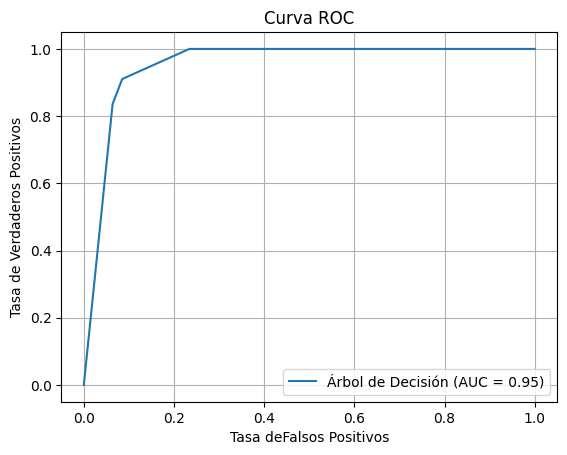

In [14]:
# Crear y entrenarel clasificador k-NN
knn_cancer =KNeighborsClassifier(n_neighbors=3)
knn_cancer.fit(X_entrenamiento,y_entrenamiento)

# Predecir sobre el conjunto de test
y_pred= knn_cancer.predict(X_test)
y_pred_probabilidad =knn_cancer.predict_proba(X_test)

# Calcular métricas
accuracy =accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
f1 =f1_score(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred_probabilidad[:, 1]) #Pasar sólo una columna de probabilidades. Me error al pasar las dos columnas de probabilidades
#Imprimir las métricas
print("Accuracy:",round(float(accuracy), 3))
print("Precision:", round(float(precision), 3))
print("Recall:", round(float(recall), 3))
print("F1-Score:",round(float(f1), 3))
print("AUC:", round(float(auc), 3))

# Dibujar la curva ROC
ratio_falso_positivo,ratio_verdaderos_positivos, umbral =roc_curve(y_test, y_pred_probabilidad[:, 1]) #Pasar sólo una columna de probabilidades. Me error al pasar las dos columnas de probabilidades
plt.plot(ratio_falso_positivo,ratio_verdaderos_positivos, label=f'Árbol de Decisión (AUC = {auc:.2f})')
plt.xlabel('Tasa deFalsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 3.2: Árbol de decicisión

Accuracy: 0.904
Precision: 0.952
Recall: 0.881
F1-Score: 0.915
AUC: 0.908


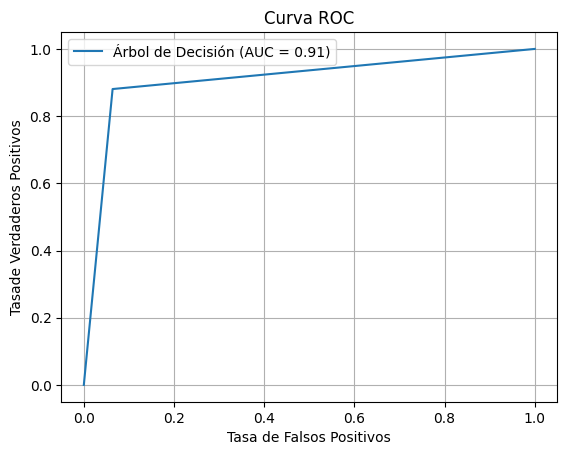

In [15]:
#Crear y entrenar el Árbol de Decisión
arbol_cancer =DecisionTreeClassifier()
arbol_cancer.fit(X_entrenamiento,y_entrenamiento)

# Predecir sobre el conjunto de test
y_pred_arbol =arbol_cancer.predict(X_test)
y_pred_probabilidad_arbol =arbol_cancer.predict_proba(X_test)

# Calcular métricas
accuracy_arbol = accuracy_score(y_test,y_pred_arbol)
precision_arbol = precision_score(y_test,y_pred_arbol)
recall_arbol = recall_score(y_test, y_pred_arbol)
f1_arbol =f1_score(y_test, y_pred_arbol)
auc_arbol= roc_auc_score(y_test,y_pred_probabilidad_arbol[:, 1]) #Pasar sólo una columna de probabilidades. Me error al pasar las dos columnas de probabilidades

#Imprimir las métricas
print("Accuracy:", round(float(accuracy_arbol), 3))
print("Precision:",round(float(precision_arbol), 3))
print("Recall:", round(float(recall_arbol), 3))
print("F1-Score:",round(float(f1_arbol),3))
print("AUC:", round(float(auc_arbol), 3))

#Dibujar la curva ROC
ratio_falso_positivo_arbol, ratio_verdaderos_positivos_arbol, umbral_arbol = roc_curve(y_test, y_pred_probabilidad_arbol[:, 1]) #Pasar sólo una columna de probabilidades. Me error al pasar las dos columnas de probabilidades
plt.plot(ratio_falso_positivo_arbol, ratio_verdaderos_positivos_arbol, label=f'Árbol de Decisión (AUC = {auc_arbol:.2f})')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasade Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Crear el diccionario de resultados
resultados_modelos={
    'Modelo':['k-NN', 'Árbol de Decisión'],
    'Accuracy': [accuracy,accuracy_arbol],
    'Precisión':[precision, precision_arbol],
    'Recall': [recall, recall_arbol],
    'F1-Score':[f1,f1_arbol],
    'AUC': [auc,auc_arbol]}

#Crear DataFrame
df_resultados = pd.DataFrame(resultados_modelos)
print(df_resultados)

              Modelo  Accuracy  Precisión    Recall  F1-Score       AUC
0               k-NN  0.912281   0.938462  0.910448  0.924242  0.953477
1  Árbol de Decisión  0.903509   0.951613  0.880597  0.914729  0.908384


### Comparación y análisis de los modelos

- Ambos modelos (k-NN y Árbol de Decisión) aciertan casi lo mismo en sus predicciones (Accuracy de 0.91), así que los dos funcionan bien con estos datos.
- El Árbol de Decisión tiene una Precisión más alta, lo que significa que suele acertar más cuando dice que hay cáncer.
- El k-NN tiene un Recall más alto, es decir, detecta mejor la mayoría de los casos de cáncer. Esto es muy importante en un problema como el cáncer, donde no queremos que el modelo se equivoque y diga que una persona está sana cuando realmente tiene cáncer (falso negativo).
- El AUC también es ligeramente mejor para k-NN, así que separa un poco mejor las dos clases (personas sanas y personas con cáncer).
- En resumen,los resultados de ambos modelos son muy parecidosen todas las métricas.

### Sobre el sobreajuste (overfitting) y subajuste (underfitting):

- No parece que ninguno de los dos modelos esté sobreajustando ni subajustando,porque los resultados son estables ytodas las métricas tienen valores razonables, sin valores raros o muy bajos.

### Resumen

- Si lo más importante es no fallar cuando decimos que hay cáncer(mayor Precisión), el Árbol de Decisión es una buena opción.
- Si queremos detectar el mayor número de casos posibles (mayor Recall), es mejor usar k-NN.
- En un problema de cáncer, lo más importante es no dejar pasar ningún caso positivo, por lo que el Recall es la métrica clave. Por eso, k-NN sería la mejor opción en este caso.


# Ejercicio 4: Análisis de Series Temporales

       Month  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121


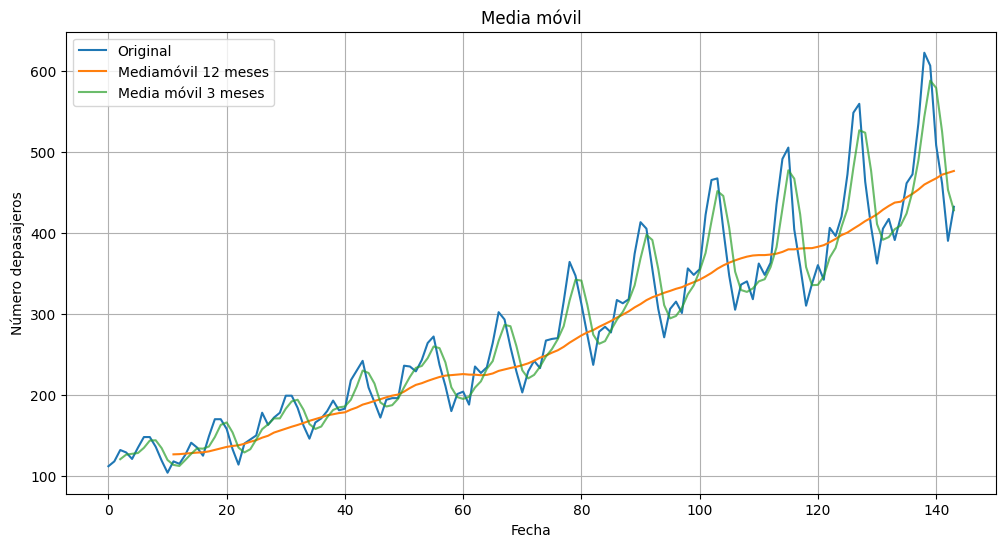

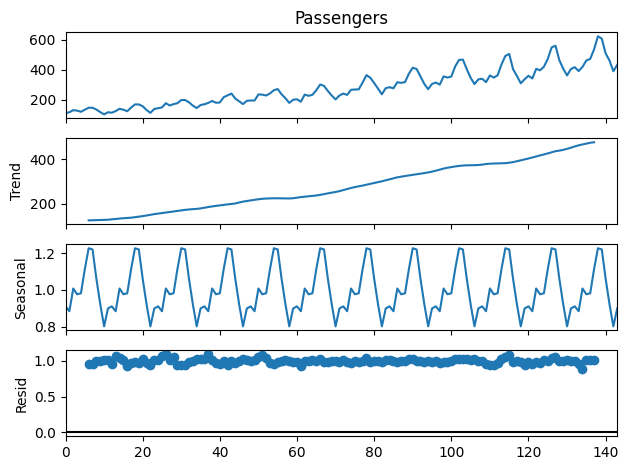

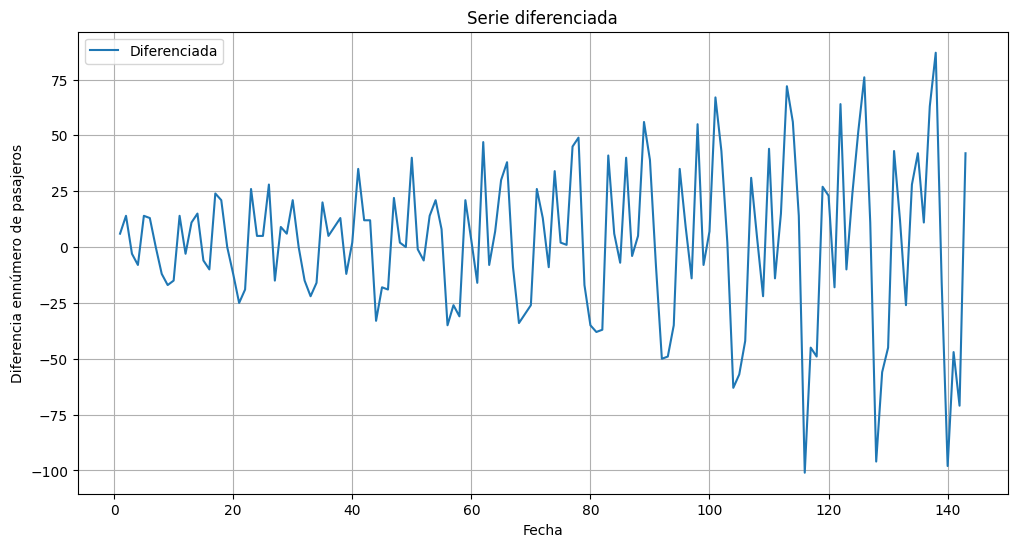

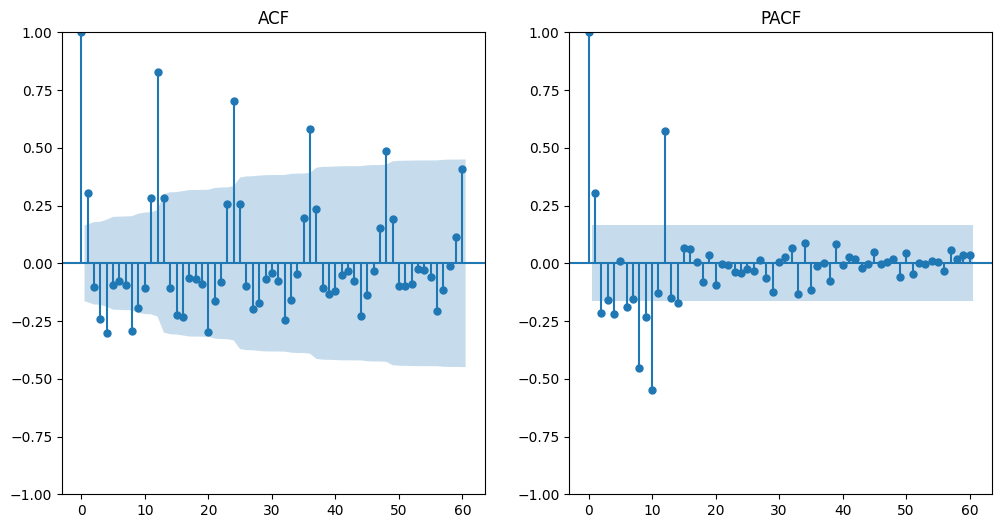

In [17]:
# Cargar los datos.Hay que tener el archivo 'airline-passengers.csv' en el mismo directorio
df = pd.read_csv('airline-passengers.csv', parse_dates=['Month']) #Las fechas deben estar en formato datetime

#Visualizar las primeras filas
print(df.head())

#Calcular y dibujar medias móviles (12meses y 3 meses)
df['media_movil_12']= df['Passengers'].rolling(window=12).mean()
df['media_movil_3']=df['Passengers'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'],label='Original')
plt.plot(df['media_movil_12'], label='Mediamóvil 12 meses')
plt.plot(df['media_movil_3'],label='Media móvil 3 meses', alpha=0.7)
plt.title('Media móvil')
plt.xlabel('Fecha')
plt.ylabel('Número depasajeros')
plt.legend()
plt.grid(True)
plt.show()

# Descomposición dela serie temporal
resultado =seasonal_decompose(df['Passengers'],model='multiplicative',period=12)
resultado.plot()
plt.show()

#Diferenciar la serie para ver si es estacionaria
df['diferenciada']= df['Passengers'].diff()

plt.figure(figsize=(12,6))
plt.plot(df['diferenciada'])
plt.title('Serie diferenciada')
plt.xlabel('Fecha')
plt.ylabel('Diferencia ennúmero de pasajeros')
plt.legend(labels=['Diferenciada'])
plt.grid(True)
plt.show()

#Autocorrelación y autocorrelación parcial
plt.figure(figsize=(12, 6))
plt.subplot(1, 2,1)
plot_acf(df['diferenciada'].dropna(), ax=plt.gca(), lags=60)
plt.title('ACF')
plt.subplot(1,2, 2)
plot_pacf(df['diferenciada'].dropna (), ax=plt.gca(),lags=60)
plt.title('PACF')
plt.show()

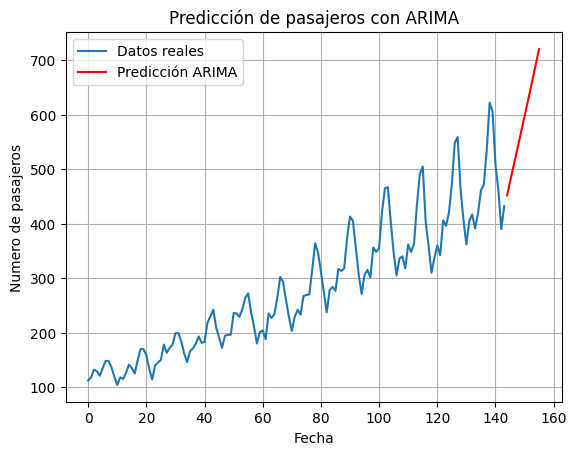

In [18]:
# Ajustarel modelo ARIMA
modelo= ARIMA(df['Passengers'],order=(1,3,1)) #He tenido que ajustar el orden del modelo ARIMA para que se ajuste más a los datos
resultado =modelo.fit()

#Predecirlos próximos 12 meses
pred =resultado.forecast(steps=12)

# Mostrarla serie real ylas predicciones
plt.plot(df['Passengers'], label='Datos reales')
plt.plot(pred.index, pred,label='Predicción ARIMA',color='red')
plt.title('Predicción de pasajeros con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Numero de pasajeros')
plt.legend()
plt.grid(True)
plt.show()

### 1.Características estadísticas de la serie

- La serie muestra una tendencia clara de subida, es decir, el número de pasajeros va creciendo a lo largo de los años
- Hay patrones que se repiten cada año (estacionalidad), como meses donde siempre hay más pasajeros (probablemente por vacaciones).
- Las diferencias entre los picos altos y bajos se van haciendo cada vez más grandes con el paso del tiempo.
- Ni la media ni la varianza se mantienen estables, así que la serie no es estacionaria.

### 2. ¿Es estacionaria?

- La serie no es estacionaria, porque sus valores cambian y suben con el tiempo.
- Cuando se diferencia la serie (restando cada valor con el anterior), la gráfica se vuelve más estable,pero todavía se ven ciertos patrones repetidos.
- Las gráficas de autocorrelación (ACF y PACF) muestran que los valores siguen dependiendo de los meses anteriores, ya que no bajan a cero rápido.

### 3. Predicción para el futuro inmediato

- El modelo ARIMA (1,3,1) logra captar la tendencia general de aumento en el número de pasajeros con el tiempo, mostrando una predicción ascendente. Sin embargo, no es capaz de reproducir los picos y valles estacionales que se observan cada año en los datos reales. Como resultado, la predicción aparece como una línea al alza que no refleja los altibajos mensuales característicos de la serie original.
- También se espera que sigan apareciendo los picos en ciertos meses, repitiendo el patrón estacional que ya se ha visto en los años anteriores.

### 4. ¿Qué deberíamos modelar para predecir mejor?

- Es importante tener en cuenta la tendencia (que la serie sube con el tiempo).
- Hay que modelar la estacionalidad, porque cada año hay meses con más pasajeros que otros
- Se debe considerar el ruido o valores anómalos, que no siguen la tendencia ni el patrón estacional.
- Si ocurren eventos especiales que cambien mucho los datos, habría que incorporarlos en el modelo
